In [1]:
import os
import h5py
import time
import pymp
import numpy as np
import pyfftw as ft
import matplotlib.pyplot as plt

In [2]:
N = 1024

In [3]:
start = time.time()

wiz = ('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n','(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf_16 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_dft_indirect_register 0 #x10fdd #x10fdd #x0 #x4708cf10 #x9dd6031e #x074d1f25 #xae61f28f)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf6b156b6 #x69706c05 #x3801e8c2 #xccec020e)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24 #xc8cff39e #xa823c75f #x926c5590)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x660a6630 #xc4ce3c6a #x62a726bb #x4f6728ee)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t2fv_32_avx 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x51cb679a #x7537ad6d #x1fc7433b #x71e04136)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1b302212 #x94fbdfad #xf5eb1b1e #x9cbc4116)\n  (fftwf_codelet_r2cf_64 0 #x11bdd #x11bdd #x0 #xfd689742 #x8cf30941 #x28dc0368 #x1d560726)\n  (fftwf_codelet_r2cfII_16 2 #x11bdd #x11bdd #x0 #xf9dc5ef5 #xdbec3d0d #x0942416f #x9d652f91)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf91e412c #xc1e62b4b #xb772f42b #x91524b5a)\n  (fftwf_dft_r2hc_register 0 #x10fdd #x10fdd #x0 #xf198bf27 #xb1c4fdb7 #xc76c5370 #xacd19ffe)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_r2cf_16 2 #x11bdd #x11bdd #x0 #x50d2f46f #x7308bf05 #x1e8d0b64 #x12981444)\n  (fftwf_rdft_rank0_register 6 #x10fdd #x10fdd #x0 #x31fc48ea #x91190d4a #x7e381771 #xc41342ed)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #xdbd34cc3 #x010b1fae #x10e8d12b #x05b15faf)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_codelet_n1_32 0 #x10fdd #x10fdd #x0 #xd3a62617 #x8a0451dd #x42952706 #x6501219f)\n  (fftwf_codelet_t1bv_32_avx 0 #x10bdd #x10bdd #x0 #x354d5c68 #x9e923e23 #xcdb19ec8 #xc1743254)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xb99abc38 #x8ead8d6b #xf0c5f1c4 #x54d4dbc2)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xc38de049 #x749dcc3a #x59c86a86 #xfac577ce)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x9382d45c #x3b4ef564 #x05a9af24 #x70bb1b32)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x043e2cd1 #x12fa8aea #x17cd7852 #xfeb5d3ec)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_codelet_n1bv_32_avx 0 #x10bdd #x10bdd #x0 #x308753a3 #xcc3d5e80 #xf64312e3 #xc698c209)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xdeee3024 #xbaceb843 #xf78f49d6 #x68b91457)\n)\n','(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

3.55728697777


In [4]:
start = time.time()

u = np.zeros((N,N,N), dtype='float32')
v = np.zeros((N,N,N), dtype='float32')
w = np.zeros((N,N,N), dtype='float32')

end = time.time()
print(end-start)

0.000401973724365


In [5]:
start = time.time()

nproc = 8
nx = N//nproc

vx = np.zeros((N//nproc,N,N), dtype='float32')
vy = np.zeros((N//nproc,N,N), dtype='float32')
vz = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/admin/scratch'

for k in range(nproc):
    print("Slab : "+str(k))
    filename = 'ref-isotropic1024coarse-'+str(k)+'-(t=0.0).npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    if(int(content['nproc'])!=nproc):
        print("Unmatched number of processes. Must first pre-process to adequate number of process")
    
    vx[:,:,:] = content['vx']
    vy[:,:,:] = content['vy']
    vz[:,:,:] = content['vz']
    
    u[k*nx:(k+1)*nx,:,:] = vx[:,:,:]
    v[k*nx:(k+1)*nx,:,:] = vy[:,:,:]
    w[k*nx:(k+1)*nx,:,:] = vz[:,:,:]

end = time.time()
print(end-start)

Slab : 0
Slab : 1
Slab : 2
Slab : 3
Slab : 4
Slab : 5
Slab : 6
Slab : 7
31.5552301407


In [6]:
del vx,vy,vz

In [7]:
start = time.time()

Nt = 8
shS = pymp.shared.array(Nt, dtype='float32')

end = time.time()
print(end-start)

0.000442028045654


In [8]:
chk = N//Nt

In [9]:
start = time.time()

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shS[idx] = np.average(u[idx*chk:(idx+1)*chk,:,:]**2+v[idx*chk:(idx+1)*chk,:,:]**2+w[idx*chk:(idx+1)*chk,:,:]**2)

avgK = 0.5*np.average(shS)

print("Average u^2",avgK)
        
end = time.time()
print(end-start,"s")

('Average u^2', 0.68271917104721069)
(3.3859939575195312, 's')


In [10]:
start = time.time()

kx=np.zeros((N,N,N//2+1), dtype='complex64')
ky=np.zeros((N,N,N//2+1), dtype='complex64')
kz=np.zeros((N,N,N//2+1), dtype='complex64')
k2=np.zeros((N,N,N//2+1), dtype='complex64')

end = time.time()
print(end-start)

0.000500917434692


In [11]:
Nt = 8

In [12]:
start = time.time()

shA = pymp.shared.array((N,N,N), dtype='float32')

end = time.time()
print(end-start)

1.88340306282


In [13]:
start = time.time()

for i in range(N):
    kx[i,:,:]=(i+N//2)%N - N//2

for j in range(N):
    ky[:,j,:]=(j+N//2)%N - N//2

for k in range((N//2)+1):
    kz[:,:,k]=k 

k2[:,:,:] = kx[:,:,:]**2 + ky[:,:,:]**2 + kz[:,:,:]**2

end = time.time()
print(end-start)

28.9384269714


In [14]:
start = time.time()

cu = np.zeros((N,N,N//2+1), dtype='complex64')
cv = np.zeros((N,N,N//2+1), dtype='complex64')
cw = np.zeros((N,N,N//2+1), dtype='complex64')

end = time.time()
print(end-start)

0.000710010528564


In [15]:
start = time.time()

fo[:,:,:] = u[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cu[:,:,:] = bo[:,:,:]

fo[:,:,:] = v[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cv[:,:,:] = bo[:,:,:]

fo[:,:,:] = w[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cw[:,:,:] = bo[:,:,:]

end = time.time()
print(end-start)

45.5992391109


In [16]:
start = time.time()

A11 = ft.zeros_aligned((N,N,N), dtype='float32')
A12 = ft.zeros_aligned((N,N,N), dtype='float32')
A13 = ft.zeros_aligned((N,N,N), dtype='float32')
A21 = ft.zeros_aligned((N,N,N), dtype='float32')
A22 = ft.zeros_aligned((N,N,N), dtype='float32')
A23 = ft.zeros_aligned((N,N,N), dtype='float32')
A31 = ft.zeros_aligned((N,N,N), dtype='float32')
A32 = ft.zeros_aligned((N,N,N), dtype='float32')
A33 = ft.zeros_aligned((N,N,N), dtype='float32')

end = time.time()
print(end-start)

15.7970170975


In [17]:
start = time.time()

I = np.complex64(0.0+1.0j)

bo[:,:,:] = I*kx[:,:,:]*cu[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A11[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*kx[:,:,:]*cv[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A12[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*kx[:,:,:]*cw[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A13[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*ky[:,:,:]*cu[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A21[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*ky[:,:,:]*cv[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A22[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*ky[:,:,:]*cw[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A23[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*kz[:,:,:]*cu[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A31[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*kz[:,:,:]*cv[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A32[:,:,:] = fo[:,:,:]/(N**3)

bo[:,:,:] = I*kz[:,:,:]*cw[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
A33[:,:,:] = fo[:,:,:]/(N**3)

end = time.time()
print(end-start)

181.787846088


In [18]:
del cu,cv,cw

In [19]:
start = time.time()

A  = [A11,A12,A13,A21,A22,A23,A31,A32,A33]
la = ['A11','A12','A13','A21','A22','A23','A31','A32','A33']

for i in range(9):
    with pymp.Parallel(Nt) as p:
        for idx in p.range(0,Nt):
            shS[idx] = np.average(A[i])
    
    Aav = np.average(shS)
    print("<"+la[i]+"> = "+str(Aav))
    
end = time.time()
print(end-start)

<A11> = 4.29281e-10
<A12> = -8.62493e-07
<A13> = 4.94154e-07
<A21> = -8.73115e-11
<A22> = -3.65617e-10
<A23> = 1.39698e-09
<A31> = 1.91045e-11
<A32> = 3.86609e-11
<A33> = 1.23199e-11
63.3203241825


In [20]:
start = time.time()

A  = [A11,A12,A13,A21,A22,A23,A31,A32,A33]
la = ['A11','A12','A13','A21','A22','A23','A31','A32','A33']

for i in range(9):
    # A2av = np.average(A[i]**2)
    with pymp.Parallel(Nt) as p:
        for idx in p.range(0,Nt):
            shS[idx] = np.average(A[i][idx*chk:(idx+1)*chk,:,:]**2)
    
    A2av = np.average(shS)
    print("<"+la[i]+"^2> = "+str(A2av))
    
end = time.time()
print(end-start)

<A11^2> = 33.2611
<A12^2> = 66.9627
<A13^2> = 67.0289
<A21^2> = 65.7716
<A22^2> = 33.0683
<A23^2> = 65.7398
<A31^2> = 66.6281
<A32^2> = 66.7571
<A33^2> = 33.2177
56.0414369106


In [21]:
start = time.time()

A  = [A11,A12,A13,A21,A22,A23,A31,A32,A33]
la = ['A11','A12','A13','A21','A22','A23','A31','A32','A33']

for i in range(9):
    with pymp.Parallel(Nt) as p:
        for idx in p.range(0,Nt):
            shS[idx] = np.average(A[i][idx*chk:(idx+1)*chk,:,:]**2)
    
    A2av = np.average(shS)
    print("<"+la[i]+"^2> = "+str(A2av))
    
    with pymp.Parallel(Nt) as p:
        for idx in p.range(0,Nt):
            shS[idx] = np.average((A[i][idx*chk:(idx+1)*chk,:,:]/np.sqrt(A2av))**3)
    
    A3av_skew = np.average(shS)
    print("skewness = <"+la[i]+"^3>/"+"<"+la[i]
                        +"^2>^(3/2) "+"= "+str(A3av_skew) )
    
end = time.time()
print(end-start)

<A11^2> = 33.2611
skewness = <A11^3>/<A11^2>^(3/2) = -0.590256
<A12^2> = 66.9627
skewness = <A12^3>/<A12^2>^(3/2) = -0.026207
<A13^2> = 67.0289
skewness = <A13^3>/<A13^2>^(3/2) = -0.0445999
<A21^2> = 65.7716
skewness = <A21^3>/<A21^2>^(3/2) = -0.00580457
<A22^2> = 33.0683
skewness = <A22^3>/<A22^2>^(3/2) = -0.553908
<A23^2> = 65.7398
skewness = <A23^3>/<A23^2>^(3/2) = -0.0494113
<A31^2> = 66.6281
skewness = <A31^3>/<A31^2>^(3/2) = 0.0038656
<A32^2> = 66.7571
skewness = <A32^3>/<A32^2>^(3/2) = 0.00726923
<A33^2> = 33.2177
skewness = <A33^3>/<A33^2>^(3/2) = -0.57632
212.496096849


In [22]:
start = time.time()

# div = A11+A22+A33 
with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shA[idx*chk:(idx+1)*chk,:,:] = A11[idx*chk:(idx+1)*chk,:,:]+A22[idx*chk:(idx+1)*chk,:,:]+A33[idx*chk:(idx+1)*chk,:,:]

# div2av = np.average(div**2)
with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shS[idx] = np.average(shA[idx*chk:(idx+1)*chk,:,:]**2)
        
div2av = np.average(shS)
print("sqrt(<(div v)^2>) = "+str(np.sqrt(div2av)))
    
end = time.time()
print(end-start)

sqrt(<(div v)^2>) = 7.39278e-05
12.9331228733


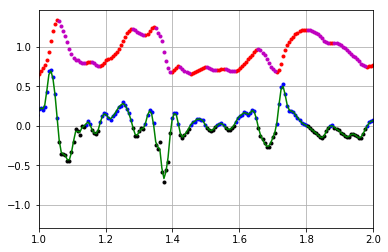

In [23]:
%matplotlib inline

vx_xl  =   u[:,0,0]
vx_xldx = A11[:,0,0]

pos = vx_xldx > 0
neg = vx_xldx < 0
scale = 30

Y = np.linspace(0,2.*np.pi,N,endpoint=False)
    
dx = 2.*np.pi/1024
vlgrx = np.gradient(vx_xl)/dx
    
plt.plot(Y[pos],vx_xl[pos],'r.')
plt.plot(Y[pos],vx_xldx[pos]/scale,'b.')
    
plt.plot(Y[neg],vx_xl[neg],'m.')
plt.plot(Y[neg],vx_xldx[neg]/scale,'k.')
    
plt.plot(Y,vlgrx/scale,'g')
plt.grid()
    
plt.xlim((1,2))
  
plt.show()

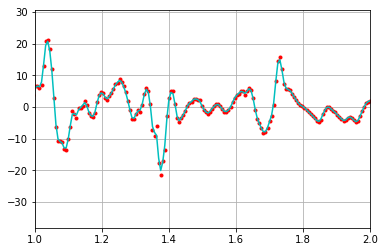

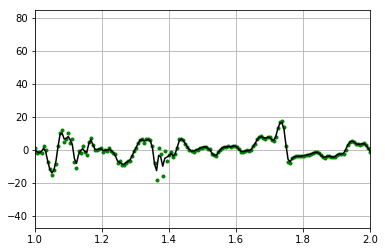

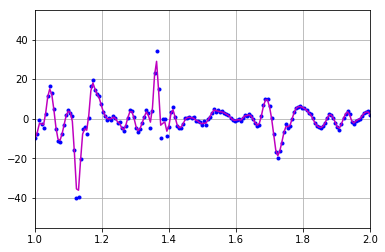

In [24]:
%matplotlib inline

vx_xl   =   u[:,0,0]
vy_xl   =   v[:,0,0]
vz_xl   =   w[:,0,0]

vx_xldx = A11[:,0,0]
vy_xldx = A12[:,0,0]
vz_xldx = A13[:,0,0]

dx = (2.*np.pi)/N

vxlgrx = np.gradient(vx_xl)/dx
vylgrx = np.gradient(vy_xl)/dx
vzlgrx = np.gradient(vz_xl)/dx

pos = vx_xldx > 0
neg = vx_xldx < 0
scale = 30

Y = np.linspace(0,2.*np.pi,N,endpoint=False)

########################

plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldx,'r.')
plt.plot(Y,vxlgrx,'c-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldx,'g.')
plt.plot(Y,vylgrx,'k-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vz_xldx,'b.')
plt.plot(Y,vzlgrx,'m-')
    
plt.show()

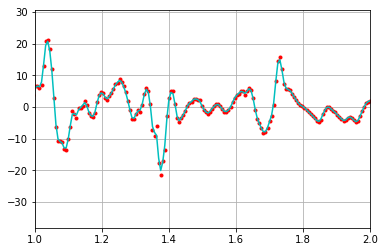

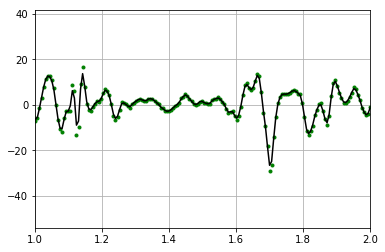

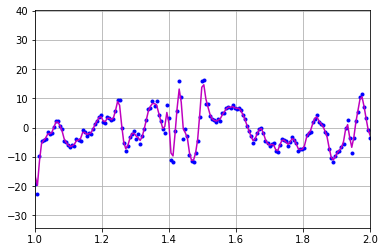

In [25]:
%matplotlib inline

vx_xl   =   u[:,0,0]
vx_yl   =   u[0,:,0]
vx_zl   =   u[0,0,:]

vx_xldx = A11[:,0,0]
vx_xldy = A21[0,:,0]
vx_xldz = A31[0,0,:]

dx = (2.*np.pi)/N

vxlgrx = np.gradient(vx_xl)/dx
vxlgry = np.gradient(vx_yl)/dx
vxlgrz = np.gradient(vx_zl)/dx

Y = np.linspace(0,2.*np.pi,N,endpoint=False)

########################

plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldx,'r.')
plt.plot(Y,vxlgrx,'c-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldy,'g.')
plt.plot(Y,vxlgry,'k-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vx_xldz,'b.')
plt.plot(Y,vxlgrz,'m-')
    
plt.show()

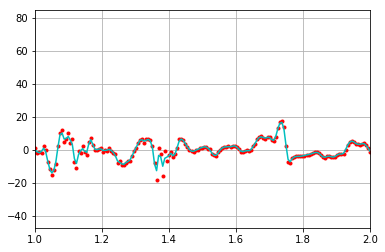

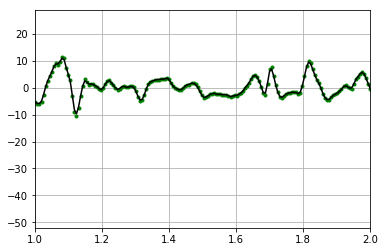

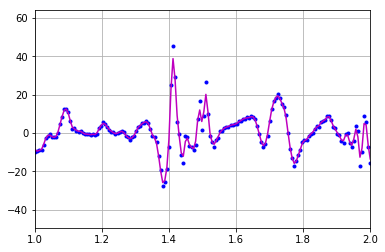

In [26]:
%matplotlib inline

vy_xl   =   v[:,0,0]
vy_yl   =   v[0,:,0]
vy_zl   =   v[0,0,:]

vy_xldx = A12[:,0,0]
vy_xldy = A22[0,:,0]
vy_xldz = A32[0,0,:]

dx = (2.*np.pi)/N

vylgrx = np.gradient(vy_xl)/dx
vylgry = np.gradient(vy_yl)/dx
vylgrz = np.gradient(vy_zl)/dx

Y = np.linspace(0,2.*np.pi,N,endpoint=False)

########################

plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldx,'r.')
plt.plot(Y,vylgrx,'c-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldy,'g.')
plt.plot(Y,vylgry,'k-')
    
plt.show()
   
plt.xlim((1,2))
plt.grid()
plt.plot(Y,vy_xldz,'b.')
plt.plot(Y,vylgrz,'m-')
    
plt.show()

In [27]:
start = time.time()

Q = np.zeros((N,N,N), dtype='float32')

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shA[idx*chk:(idx+1)*chk,:,:] = A12[idx*chk:(idx+1)*chk,:,:]*A21[idx*chk:(idx+1)*chk,:,:]
        shA[idx*chk:(idx+1)*chk,:,:] += A23[idx*chk:(idx+1)*chk,:,:]*A32[idx*chk:(idx+1)*chk,:,:] 
        shA[idx*chk:(idx+1)*chk,:,:] += A13[idx*chk:(idx+1)*chk,:,:]*A31[idx*chk:(idx+1)*chk,:,:] 
        shA[idx*chk:(idx+1)*chk,:,:] -= A22[idx*chk:(idx+1)*chk,:,:]*A33[idx*chk:(idx+1)*chk,:,:] 
        shA[idx*chk:(idx+1)*chk,:,:] -= A11[idx*chk:(idx+1)*chk,:,:]*A33[idx*chk:(idx+1)*chk,:,:] 
        shA[idx*chk:(idx+1)*chk,:,:] -= A11[idx*chk:(idx+1)*chk,:,:]*A22[idx*chk:(idx+1)*chk,:,:]

Q[:,:,:] = shA[:,:,:]
    
end = time.time()
print(end-start)

11.5768928528


In [28]:
start = time.time()

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shS[idx] = np.average(Q[idx*chk:(idx+1)*chk,:,:])
        
avgQ = np.average(shS)
        
print("Average Q = "+str(avgQ))
    
end = time.time()
print(end-start)

Average Q = 1.87196e-07
6.23939704895


In [29]:
start = time.time()

R = np.zeros((N,N,N), dtype='float32')

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shA[idx*chk:(idx+1)*chk,:,:] = A11[idx*chk:(idx+1)*chk,:,:]**3
        shA[idx*chk:(idx+1)*chk,:,:] += A22[idx*chk:(idx+1)*chk,:,:]**3
        shA[idx*chk:(idx+1)*chk,:,:] += A33[idx*chk:(idx+1)*chk,:,:]**3
        shA[idx*chk:(idx+1)*chk,:,:] += 3*A11[idx*chk:(idx+1)*chk,:,:]*(A21[idx*chk:(idx+1)*chk,:,:]*A12[idx*chk:(idx+1)*chk,:,:]+A13[idx*chk:(idx+1)*chk,:,:]*A31[idx*chk:(idx+1)*chk,:,:])
        shA[idx*chk:(idx+1)*chk,:,:] += 3*A22[idx*chk:(idx+1)*chk,:,:]*(A12[idx*chk:(idx+1)*chk,:,:]*A21[idx*chk:(idx+1)*chk,:,:]+A23[idx*chk:(idx+1)*chk,:,:]*A32[idx*chk:(idx+1)*chk,:,:])
        shA[idx*chk:(idx+1)*chk,:,:] += 3*A33[idx*chk:(idx+1)*chk,:,:]*(A13[idx*chk:(idx+1)*chk,:,:]*A31[idx*chk:(idx+1)*chk,:,:]+A23[idx*chk:(idx+1)*chk,:,:]*A32[idx*chk:(idx+1)*chk,:,:])
        shA[idx*chk:(idx+1)*chk,:,:] += 3*A13[idx*chk:(idx+1)*chk,:,:]*A21[idx*chk:(idx+1)*chk,:,:]*A32[idx*chk:(idx+1)*chk,:,:]
        shA[idx*chk:(idx+1)*chk,:,:] += 3*A12[idx*chk:(idx+1)*chk,:,:]*A23[idx*chk:(idx+1)*chk,:,:]*A31[idx*chk:(idx+1)*chk,:,:]
                    
R[:,:,:] = shA[:,:,:]
    
end = time.time()
print(end-start)

50.3378479481


In [30]:
start = time.time()

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shS[idx] = np.average(Q[idx*chk:(idx+1)*chk,:,:]**2)
        
avgQ2 = np.average(shS)
        
print("<Q^2> = "+str(avgQ2))
    
end = time.time()
print(end-start)

<Q^2> = 70716.7
6.79322600365


In [31]:
start = time.time()

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shS[idx] = np.average(R[idx*chk:(idx+1)*chk,:,:])
        
avgR = np.average(shS)
        
print("<R>/<Q^2>^(3/2) = "+str(avgR/(avgQ2**1.5)))
    
end = time.time()
print(end-start)

<R>/<Q^2>^(3/2) = -2.05636008341e-10
6.61206889153


In [32]:
del Q,R

In [33]:
start = time.time()

Omega = np.zeros((N,N,N), dtype='float32')

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shA[idx*chk:(idx+1)*chk,:,:] = A12[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A21[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A13[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A31[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A23[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A32[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] -= 2.*A12[idx*chk:(idx+1)*chk,:,:]*A21[idx*chk:(idx+1)*chk,:,:]
        shA[idx*chk:(idx+1)*chk,:,:] -= 2.*A13[idx*chk:(idx+1)*chk,:,:]*A31[idx*chk:(idx+1)*chk,:,:]
        shA[idx*chk:(idx+1)*chk,:,:] -= 2.*A23[idx*chk:(idx+1)*chk,:,:]*A32[idx*chk:(idx+1)*chk,:,:]
                    
Omega[:,:,:] = 0.5*shA[:,:,:]
    
end = time.time()
print(end-start)

15.7852621078


In [34]:
start  = time.time()

Epsilon = np.zeros((N,N,N), dtype='float32')

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shA[idx*chk:(idx+1)*chk,:,:] = A11[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A22[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A33[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += 0.5*A12[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += 0.5*A21[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += 0.5*A13[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += 0.5*A31[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += 0.5*A23[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += 0.5*A32[idx*chk:(idx+1)*chk,:,:]**2
        shA[idx*chk:(idx+1)*chk,:,:] += A12[idx*chk:(idx+1)*chk,:,:]*A21[idx*chk:(idx+1)*chk,:,:]
        shA[idx*chk:(idx+1)*chk,:,:] += A13[idx*chk:(idx+1)*chk,:,:]*A31[idx*chk:(idx+1)*chk,:,:]
        shA[idx*chk:(idx+1)*chk,:,:] += A23[idx*chk:(idx+1)*chk,:,:]*A32[idx*chk:(idx+1)*chk,:,:]
                    
Epsilon[:,:,:] = shA[:,:,:]
    
end = time.time()
print(end-start)

16.2434539795


In [35]:
start = time.time()

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shS[idx] = np.average(Omega[idx*chk:(idx+1)*chk,:,:])
        
avgO = np.average(shS)
    
end = time.time()
print(end-start)

6.59787106514


In [36]:
start = time.time()

with pymp.Parallel(Nt) as p:
    for idx in p.range(0,Nt):
        shS[idx] = np.average(Epsilon[idx*chk:(idx+1)*chk,:,:])
        
avgE = np.average(shS)
    
end = time.time()
print(end-start)

6.60175704956


In [37]:
print("Average enstrophy: "+str(avgO))
print("Average strainrate: "+str(avgE))
print("Average strainrate - enstrophy: "+str(avgE-avgO))
print("Normalized strainrate - enstrophy: "+str((avgE-avgO)/avgO))

Average enstrophy: 249.218
Average strainrate: 249.218
Average strainrate - enstrophy: -3.05176e-05
Normalized strainrate - enstrophy: -1.22453e-07


In [38]:
del Omega,Epsilon

In [39]:
nu = 0.000185
eps = 2*nu*avgE

In [40]:
urms = np.sqrt(2.*avgK/3)
lamb = np.sqrt(15.*nu/eps)*urms
ReTayor = urms*lamb/nu
print("nu = "+str(nu))
print("urms = "+str(urms)+", Reference: 0.6820399")
print("eps = "+ str(eps))
print("kinectic energy = "+str(avgK))
print("Taylor micro-scale ="+str(lamb))
print("ReLamb = "+str(ReTayor)+", Reference: 426.8378")

nu = 0.000185
urms = 0.674645176394, Reference: 0.6820399
eps = 0.0922105535889
kinectic energy = 0.682719171047
Taylor micro-scale =0.117035226141
ReLamb = 426.795950184, Reference: 426.8378
